In [1]:
import scanpy as sc
import decoupler as dc

# Only needed for processing
import numpy as np
import pandas as pd
from anndata import AnnData

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
experiment = "GSE164471_DDS"
comparison = 'young.vs.old'

In [3]:
results_df =  pd.read_csv(f'/home/amore/work/data/{experiment}.csv')
results_df = results_df.set_index('row')
results_df.drop(columns=['Unnamed: 0'],inplace=True)
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
ENSG00000000003.14,181.733085,0.253939,0.230710,1.100687,0.271033,0.998707
ENSG00000000005.5,1.659193,-0.848299,1.331562,-0.637071,0.524079,NaN
ENSG00000000419.12,153.734627,0.170174,0.294472,0.577894,0.563336,0.998707
ENSG00000000457.13,113.567044,0.228651,0.338365,0.675751,0.499199,0.998707
ENSG00000000460.16,300.958473,-0.183707,0.230707,-0.796278,0.425870,0.998707
...,...,...,...,...,...,...
ENSG00000285480.1,0.814474,-2.707373,1.849711,-1.463673,0.143283,NaN
ENSG00000285491.1,1.854137,-1.455629,1.280047,-1.137168,0.255468,NaN
ENSG00000285505.1,0.934983,0.495551,1.768058,0.280280,0.779263,NaN


In [4]:
ensembl_names = results_df.index
ensembl_names = ensembl_names.to_list()

In [5]:
# Retrieve gene symbols
annot = sc.queries.biomart_annotations("hsapiens",
        ["ensembl_gene_id", "external_gene_name"],
        use_cache=False
    ).set_index("ensembl_gene_id")


In [6]:
ensembl_names = [item for item in ensembl_names if item.split('.')[0] in annot.index]


In [7]:
results_df = results_df.query('index in @ensembl_names')

In [8]:
ensembl_names = [element.split('.')[0] for element in ensembl_names]


In [9]:
# Assign gene symbols
results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]
results_df

/tmp/ipykernel_29103/2304745235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['gene_symbol'] = [annot.loc[ensembl_id,'external_gene_name'] for ensembl_id in ensembl_names]


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_symbol
GeneName,,,,,,,
ENSG00000000003.14,181.733085,0.253939,0.230710,1.100687,0.271033,0.998707,TSPAN6
ENSG00000000005.5,1.659193,-0.848299,1.331562,-0.637071,0.524079,NaN,TNMD
ENSG00000000419.12,153.734627,0.170174,0.294472,0.577894,0.563336,0.998707,DPM1
ENSG00000000457.13,113.567044,0.228651,0.338365,0.675751,0.499199,0.998707,SCYL3
ENSG00000000460.16,300.958473,-0.183707,0.230707,-0.796278,0.425870,0.998707,FIRRM
...,...,...,...,...,...,...,...
ENSG00000285480.1,0.814474,-2.707373,1.849711,-1.463673,0.143283,NaN,H2BK1
ENSG00000285491.1,1.854137,-1.455629,1.280047,-1.137168,0.255468,NaN,OR1Q1BP
ENSG00000285505.1,0.934983,0.495551,1.768058,0.280280,0.779263,NaN,NaN


In [10]:
results_df.to_csv(f'/home/amore/work/data/{experiment}_gene_symbol.csv')

In [11]:
results_df = results_df.set_index('gene_symbol')
results_df.index.name = 'GeneName'
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,181.733085,0.253939,0.230710,1.100687,0.271033,0.998707
TNMD,1.659193,-0.848299,1.331562,-0.637071,0.524079,NaN
DPM1,153.734627,0.170174,0.294472,0.577894,0.563336,0.998707
SCYL3,113.567044,0.228651,0.338365,0.675751,0.499199,0.998707
FIRRM,300.958473,-0.183707,0.230707,-0.796278,0.425870,0.998707
...,...,...,...,...,...,...
H2BK1,0.814474,-2.707373,1.849711,-1.463673,0.143283,NaN
OR1Q1BP,1.854137,-1.455629,1.280047,-1.137168,0.255468,NaN
NaN,0.934983,0.495551,1.768058,0.280280,0.779263,NaN


In [12]:
def make_index_unique(df):
    # Create a dictionary to keep track of the counts
    counts = {}
    
    def unique_index(index):
        if index in counts:
            counts[index] += 1
            return f"{index}_{counts[index]}"
        else:
            counts[index] = 0
            return index
    
    # Apply the unique_index function to each index value
    new_index = [unique_index(idx) for idx in df.index]
    df.index = new_index


In [13]:
results_df = results_df[results_df.index.notnull()]
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
GeneName,,,,,,
TSPAN6,181.733085,0.253939,0.230710,1.100687,0.271033,0.998707
TNMD,1.659193,-0.848299,1.331562,-0.637071,0.524079,NaN
DPM1,153.734627,0.170174,0.294472,0.577894,0.563336,0.998707
SCYL3,113.567044,0.228651,0.338365,0.675751,0.499199,0.998707
FIRRM,300.958473,-0.183707,0.230707,-0.796278,0.425870,0.998707
...,...,...,...,...,...,...
TUSC2P1,0.587882,1.402135,1.983757,0.706808,0.479686,NaN
OR4M2-OT1,2.596745,-0.614063,1.320355,-0.465074,0.641878,NaN
H2BK1,0.814474,-2.707373,1.849711,-1.463673,0.143283,NaN


In [14]:

make_index_unique(results_df)

In [15]:
results_df = results_df.dropna()
results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
TSPAN6,181.733085,0.253939,0.230710,1.100687,0.271033,0.998707
DPM1,153.734627,0.170174,0.294472,0.577894,0.563336,0.998707
SCYL3,113.567044,0.228651,0.338365,0.675751,0.499199,0.998707
FIRRM,300.958473,-0.183707,0.230707,-0.796278,0.425870,0.998707
CFH,622.169913,-0.156159,0.324717,-0.480908,0.630582,0.998707
...,...,...,...,...,...,...
MTCO2P10,86.190149,-1.121967,0.926899,-1.210453,0.226105,0.998707
TBCE,382.650523,-0.115708,0.220268,-0.525304,0.599372,0.998707
CCDC39,47.276225,-2.197410,0.966213,-2.274251,0.022951,0.822230
POLR2J3_1,1346.623871,-0.117650,0.263772,-0.446031,0.655575,0.998707


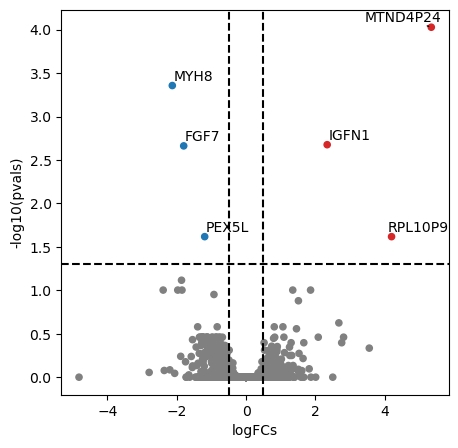

In [16]:
dc.plot_volcano_df(
    results_df,
    x='log2FoldChange',
    y='padj',
    top=10,
    figsize=(5, 5)
)

In [17]:
mat = results_df[['stat']].T.rename(index={'stat': comparison})
mat

,TSPAN6,DPM1,SCYL3,FIRRM,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,FAM169BP,MTATP6P10,FAM238C,PLD5P1,MSANTD7,MTCO2P10,TBCE,CCDC39,POLR2J3_1,C4orf36_1
young.vs.old,1.100687,0.577894,0.675751,-0.796278,-0.480908,-0.853738,0.084083,-0.143931,0.896141,-0.401291,...,-0.562021,-1.699687,-2.249631,-1.009571,0.146352,-1.210453,-0.525304,-2.274251,-0.446031,-1.353848


In [18]:
collectri = dc.get_collectri(organism='human', split_complexes=False)
collectri

,source,target,weight,PMID
0,MYC,TERT,1,10022128;10491298;10606235;10637317;10723141;1...
1,SPI1,BGLAP,1,10022617
2,SMAD3,JUN,1,10022869;12374795
3,SMAD4,JUN,1,10022869;12374795
4,STAT5A,IL2,1,10022878;11435608;17182565;17911616;22854263;2...
...,...,...,...,...
43173,NFKB,hsa-miR-143-3p,1,19472311
43174,AP1,hsa-miR-206,1,19721712
43175,NFKB,hsa-miR-21-5p,1,20813833;22387281
43176,NFKB,hsa-miR-224-5p,1,23474441;23988648


In [19]:
# Infer TF activities with ulm
tf_acts, tf_pvals = dc.run_ulm(mat=mat, net=collectri, verbose=True)
tf_acts

Running ulm on mat with 1 samples and 10637 targets for 579 sources.


,ABL1,AHR,AIRE,AP1,APEX1,AR,ARID1A,ARID4A,ARID4B,ARID5B,...,ZNF350,ZNF354C,ZNF362,ZNF382,ZNF384,ZNF436,ZNF699,ZNF76,ZNF804A,ZNF91
young.vs.old,0.307291,-0.615312,-1.61953,2.274981,0.181169,1.290388,-0.151163,0.66702,-0.575124,-0.142236,...,0.033161,0.933504,0.959964,1.212204,1.117584,0.353714,-0.385578,1.66055,1.813656,-0.065668


In [20]:
values = tf_acts.iloc[0]
values

ABL1       0.307291
AHR       -0.615312
AIRE      -1.619530
AP1        2.274981
APEX1      0.181169
             ...   
ZNF436     0.353714
ZNF699    -0.385578
ZNF76      1.660550
ZNF804A    1.813656
ZNF91     -0.065668
Name: young.vs.old, Length: 579, dtype: float32

In [21]:
down_reg = values.sort_values(ascending=True)[:5].index.to_list()

In [22]:
up_reg = values.sort_values(ascending=False)[:5].index.to_list()

In [23]:
up_down_reg = down_reg.copy()

In [24]:
up_down_reg.extend(up_reg)
up_down_reg

['NKX2-1',
 'RFXAP',
 'RFX5',
 'TBPL2',
 'BCL11A',
 'MYC',
 'SP3',
 'NRF1',
 'ETS1',
 'LMO2']

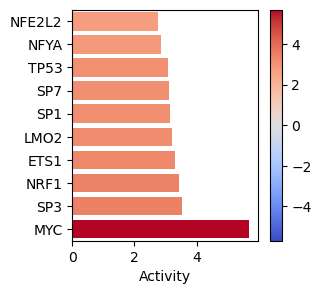

In [25]:
dc.plot_barplot(
    acts=tf_acts,
    contrast=comparison,
    top=10,
    vertical=True,
    figsize=(3, 3)
)

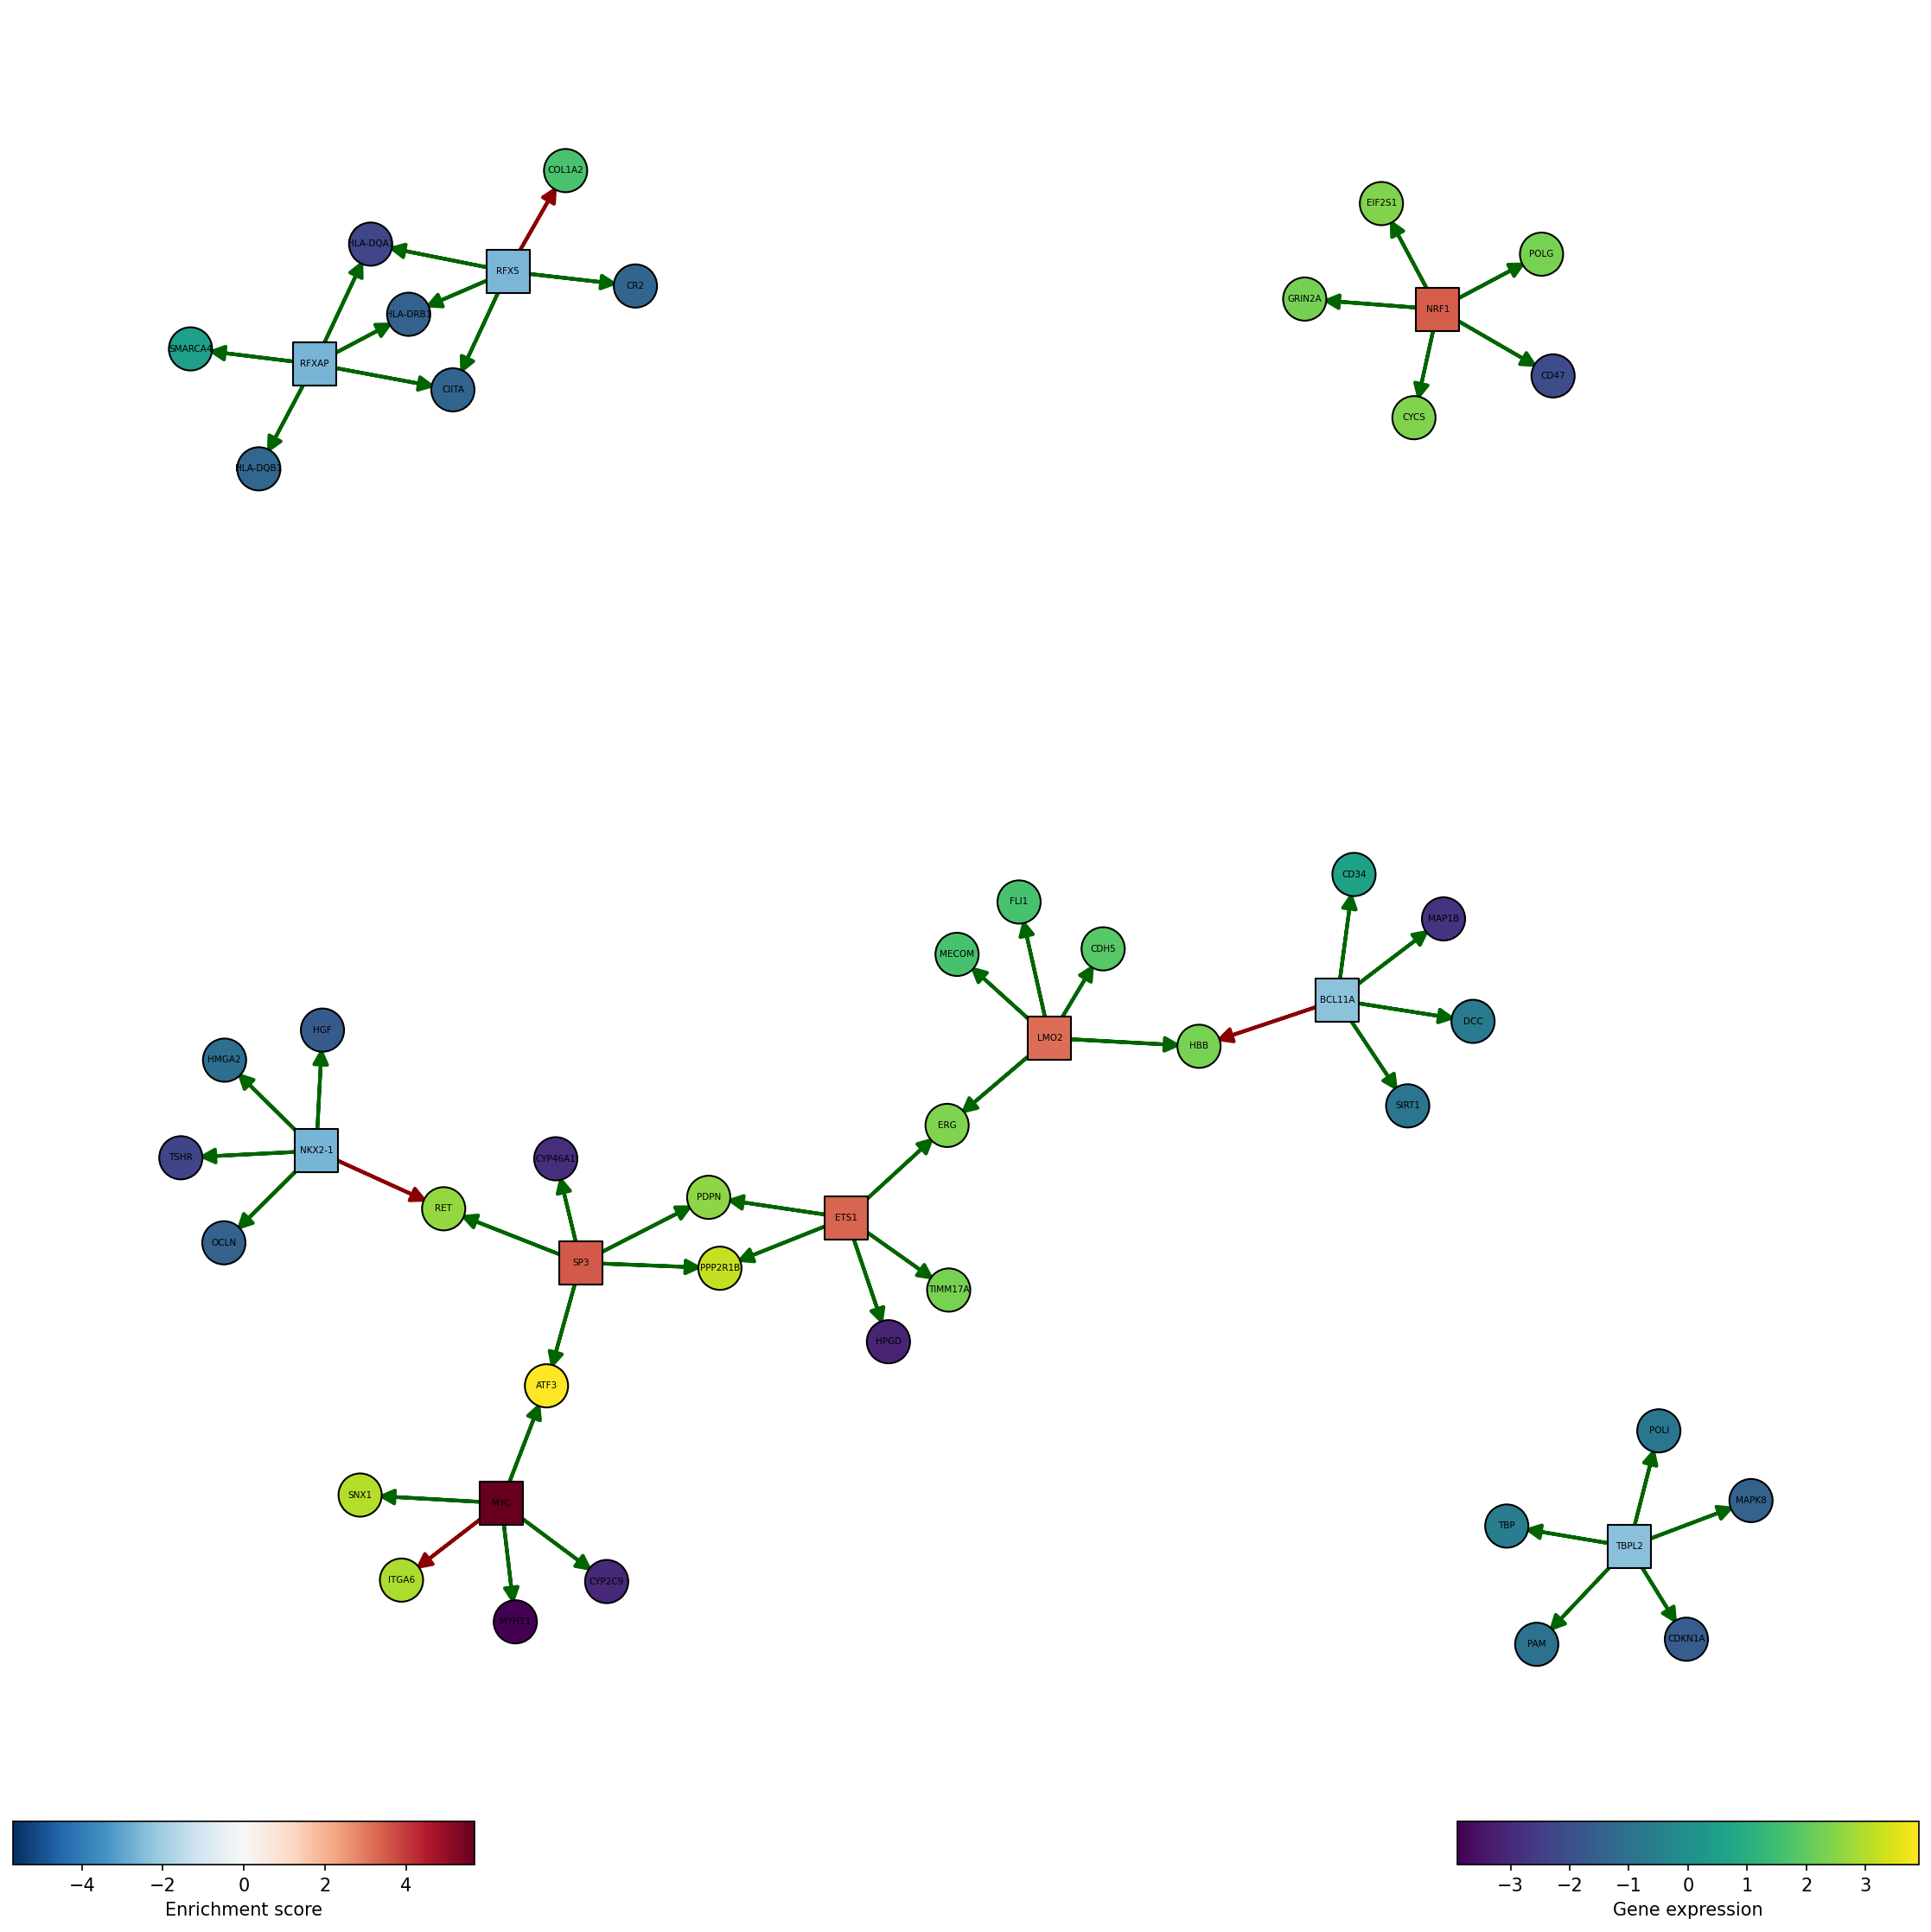

In [42]:
dc.plot_network(
    net=collectri,
    obs=mat,
    act=tf_acts,
    n_sources=up_down_reg,
    n_targets=5,
    node_size=50,
    figsize=(15, 15),
    c_pos_w='darkgreen',
    c_neg_w='darkred',
    vcenter=True,
    save=f'/home/amore/work/figures/{experiment}_network_TF.jpg'
)

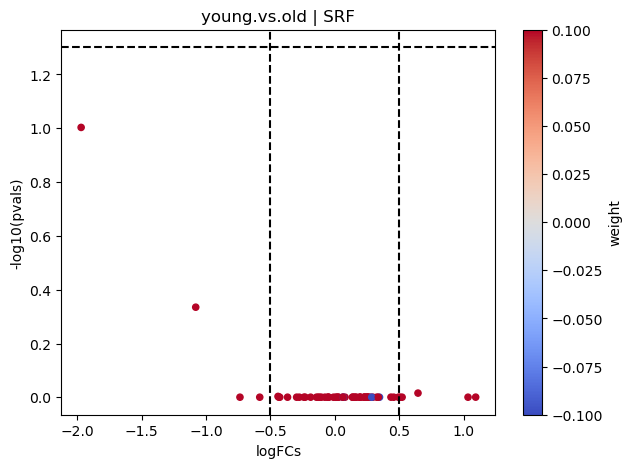

In [27]:
# Extract logFCs and pvals
logFCs = results_df[['log2FoldChange']].T.rename(index={'log2FoldChange': comparison})
pvals = results_df[['padj']].T.rename(index={'padj': comparison})

# Plot
dc.plot_volcano(
    logFCs,
    pvals,
    comparison,
    name='SRF',
    net=collectri,
    top=10,
    sign_thr=0.05,
    lFCs_thr=0.5
)

In [28]:
# Retrieve PROGENy model weights
progeny = dc.get_progeny(top=500)
progeny

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
6995,p53,ZMYM4,-2.325752,1.522388e-06
6996,p53,CFDP1,-1.628168,1.526045e-06
6997,p53,VPS37D,2.309503,1.537098e-06
6998,p53,TEDC1,-2.274823,1.547037e-06


In [29]:
# Infer pathway activities with mlm
pathway_acts, pathway_pvals = dc.run_mlm(mat=mat, net=progeny, verbose=True)
pathway_acts

Running mlm on mat with 1 samples and 10637 targets for 14 sources.


,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
young.vs.old,0.778931,2.333772,1.174968,-1.148652,-1.82432,-0.873336,-1.235559,-1.628886,3.708996,1.747889,-2.317209,2.096172,-0.766593,2.033199


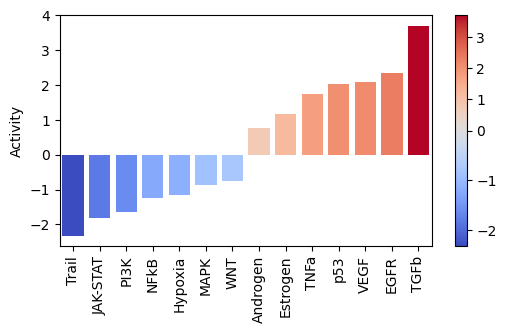

In [30]:
dc.plot_barplot(
    pathway_acts,
    comparison,
    top=25,
    vertical=False,
    figsize=(6, 3)
)

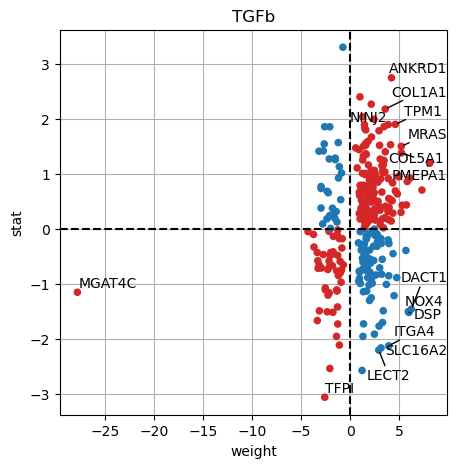

In [31]:
dc.plot_targets(results_df, stat='stat', source_name='TGFb', net=progeny, top=15)


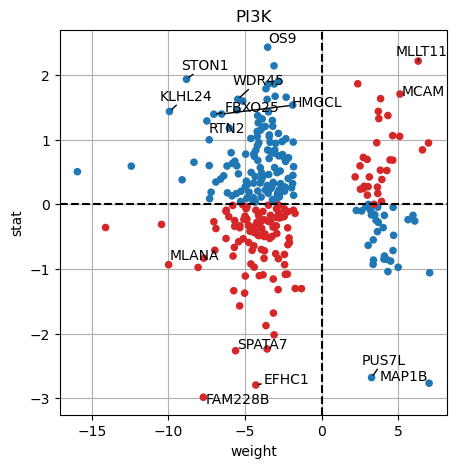

In [32]:
dc.plot_targets(results_df, stat='stat', source_name='PI3K', net=progeny, top=15)


In [33]:
msigdb = dc.get_resource('MSigDB')
msigdb

,genesymbol,collection,geneset
0,MAFF,chemical_and_genetic_perturbations,BOYAULT_LIVER_CANCER_SUBCLASS_G56_DN
1,MAFF,chemical_and_genetic_perturbations,ELVIDGE_HYPOXIA_UP
2,MAFF,chemical_and_genetic_perturbations,NUYTTEN_NIPP1_TARGETS_DN
3,MAFF,immunesigdb,GSE17721_POLYIC_VS_GARDIQUIMOD_4H_BMDC_DN
4,MAFF,chemical_and_genetic_perturbations,SCHAEFFER_PROSTATE_DEVELOPMENT_12HR_UP
...,...,...,...
3838543,PRAMEF22,go_biological_process,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...
3838544,PRAMEF22,go_biological_process,GOBP_APOPTOTIC_PROCESS
3838545,PRAMEF22,go_biological_process,GOBP_REGULATION_OF_CELL_DEATH
3838546,PRAMEF22,go_biological_process,GOBP_NEGATIVE_REGULATION_OF_DEVELOPMENTAL_PROCESS


In [34]:
# Filter by hallmark
msigdb = msigdb[msigdb['collection']=='hallmark']

# Remove duplicated entries
msigdb = msigdb[~msigdb.duplicated(['geneset', 'genesymbol'])]

# Rename
msigdb.loc[:, 'geneset'] = [name.split('HALLMARK_')[1] for name in msigdb['geneset']]

msigdb

,genesymbol,collection,geneset
233,MAFF,hallmark,IL2_STAT5_SIGNALING
250,MAFF,hallmark,COAGULATION
270,MAFF,hallmark,HYPOXIA
373,MAFF,hallmark,TNFA_SIGNALING_VIA_NFKB
377,MAFF,hallmark,COMPLEMENT
...,...,...,...
1449668,STXBP1,hallmark,PANCREAS_BETA_CELLS
1450315,ELP4,hallmark,PANCREAS_BETA_CELLS
1450526,GCG,hallmark,PANCREAS_BETA_CELLS
1450731,PCSK2,hallmark,PANCREAS_BETA_CELLS


In [35]:
# Infer enrichment with ora using significant deg
top_genes = results_df[results_df['padj'] < 0.05]

# Run ora
enr_pvals = dc.get_ora_df(
    df=top_genes,
    net=msigdb,
    source='geneset',
    target='genesymbol'
)

enr_pvals.head()

,Term,Set size,Overlap ratio,p-value,FDR p-value,Odds ratio,Combined score,Features
0,MYOGENESIS,200,0.005,0.058527,0.058527,26.933348,76.444044,MYH8


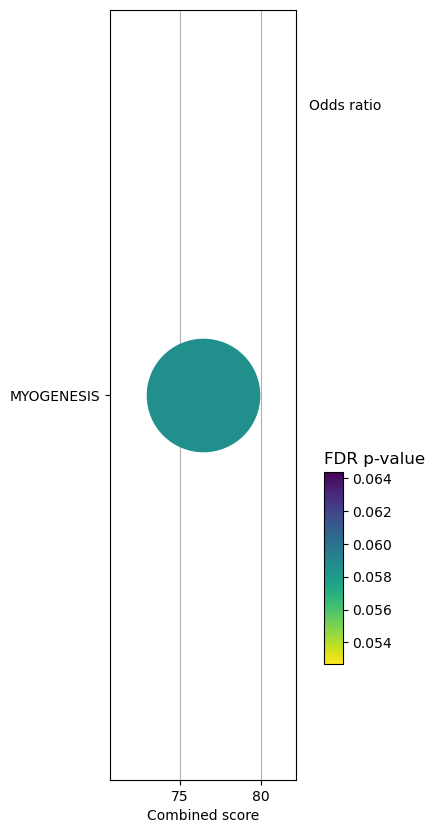

In [36]:
dc.plot_dotplot(
    enr_pvals.sort_values('Combined score', ascending=False).head(15),
    x='Combined score',
    y='Term',
    s='Odds ratio',
    c='FDR p-value',
    scale=0.5,
    figsize=(3, 10)
)

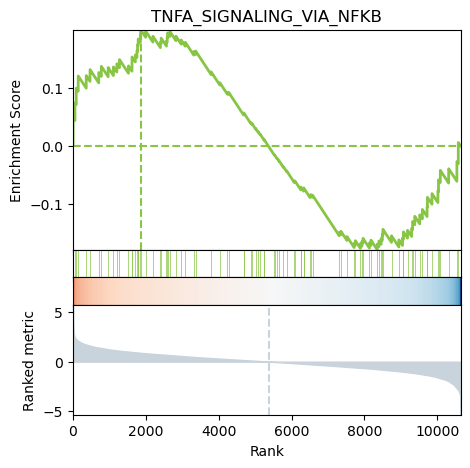

In [37]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='TNFA_SIGNALING_VIA_NFKB'
)

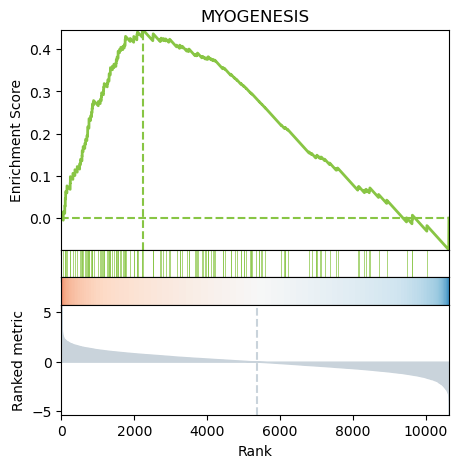

In [38]:
dc.plot_running_score(
    df=results_df,
    stat='stat',
    net=msigdb,
    source='geneset',
    target='genesymbol',
    set_name='MYOGENESIS'
)

In [39]:
import liana as ln

liana_lr = ln.resource.select_resource()
liana_lr = ln.resource.explode_complexes(liana_lr)

# Create two new DataFrames, each containing one of the pairs of columns to be concatenated
df1 = liana_lr[['interaction', 'ligand']]
df2 = liana_lr[['interaction', 'receptor']]

# Rename the columns in each new DataFrame
df1.columns = ['interaction', 'genes']
df2.columns = ['interaction', 'genes']

# Concatenate the two new DataFrames
liana_lr = pd.concat([df1, df2], axis=0)
liana_lr['weight'] = 1

# Find duplicated rows
duplicates = liana_lr.duplicated()

# Remove duplicated rows
liana_lr = liana_lr[~duplicates]

liana_lr

,interaction,genes,weight
0,LGALS9&PTPRC,LGALS9,1
1,LGALS9&MET,LGALS9,1
2,LGALS9&CD44,LGALS9,1
3,LGALS9&LRP1,LGALS9,1
4,LGALS9&CD47,LGALS9,1
...,...,...,...
5775,BMP2&ACTR2,ACTR2,1
5776,BMP15&ACTR2,ACTR2,1
5777,CSF1&CSF3R,CSF3R,1
5778,IL36G&IFNAR1,IFNAR1,1


In [40]:
# Infer lr activities with ulm
lr_score, lr_pvalue = dc.run_ulm(
    mat=mat,
    net=liana_lr,
    source='interaction',
    target='genes',
    min_n=2,
    verbose=True
)

Running ulm on mat with 1 samples and 10637 targets for 1273 sources.


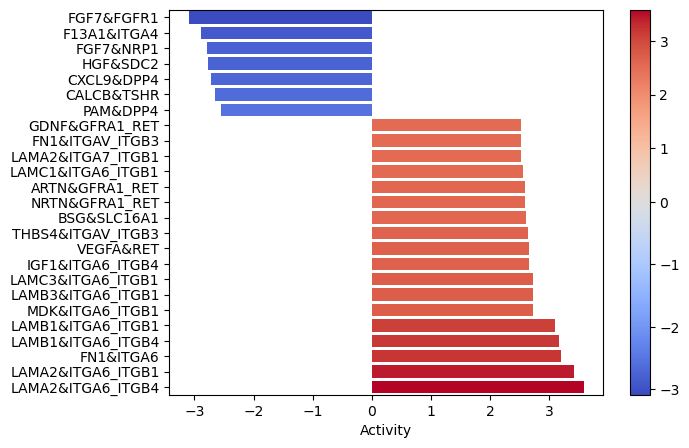

In [41]:
dc.plot_barplot(lr_score, comparison, top=25, vertical=True)
